# zomato dataset analysis and visualization

# Title: "Gastronomic Numbers: Unveiling Zomato's Data Secrets"

# 1.Importing all necessary libraries

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [241]:
df.shape

(51717, 17)

This tells us it contains 51,042 rows and 17 columns

In [242]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# 2.Data cleaning and Transformation

In [243]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


here we are removing columns as it has no use to analytical purposes.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [160]:
df.duplicated().any()

True

it says it contains duplicates

In [161]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

After droppping duplicates, it has 51609 rows and 11 columns

In [162]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

It has wrong format values such as 'NEW' and nan our goal is to either drop them or fill them with mean value

In [245]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [164]:
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [246]:
df['rate'].isnull().sum()

7775

checking for null values and it has 7775 null values across rate column

In [253]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    346
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

columns "location" , rest_type, 'cuisines', 'approx_cost(for two people)', has null values

In [255]:
df.dropna(inplace=True)

In [257]:
df.shape

(51148, 10)

Nearly 500 rows are dropped 

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51148 non-null  object
 1   online_order                 51148 non-null  object
 2   book_table                   51148 non-null  object
 3   votes                        51148 non-null  int64 
 4   location                     51148 non-null  object
 5   rest_type                    51148 non-null  object
 6   cuisines                     51148 non-null  object
 7   approx_cost(for two people)  51148 non-null  object
 8   listed_in(type)              51148 non-null  object
 9   listed_in(city)              51148 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


In [260]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [261]:
df.rename(columns = {'approx_cost(for two people)':'Cost_of_2_plates', 'listed_in(type)':'Type_of_serve'}, inplace = True)
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost_of_2_plates,Type_of_serve,listed_in(city)
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [262]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [263]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [266]:
df = df.drop(['listed_in(city)'], axis = 1)

As two columns are representing cities, we can keep only one from it.

In [268]:
df['Cost_of_2_plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [264]:
def removecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [269]:
df['Cost2plates'] = df['Cost_of_2_plates'].apply(removecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

As cost_of_2_plates have string type data, we convert them into floating type

In [270]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost_of_2_plates,Type_of_serve,Cost2plates
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,800.0
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,800.0
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,800.0
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,300.0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,600.0


In [271]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [272]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 865
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [273]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

In [274]:
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           19046
Casual Dining         10273
others                 9028
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

Here, Instead of calculating all rest types we have merging diffrent types whose count is under 1000 as "Others"

In [276]:
location = df['location'].value_counts(ascending  = False)
location_lessthan300 = location[location<300]

In [277]:
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

In [278]:
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5071
others                   4962
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
Lavelle Ro

we are doing same for location .Inst
ead of calculating all locations we have merging different locations in the bangalore city whose count is under 300 as "Others"

In [183]:
cuisines = df['cuisines'].value_counts(ascending  = False)
cuisines_lessthan100 = cuisines[cuisines<100]

In [184]:
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

In [ ]:
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

Coming to cuisines.Instead of calculating all locations, we have merging different cuisines that each resturant offer whose count is under 100 as "Others

In [279]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost_of_2_plates,Type_of_serve,Cost2plates
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,800.0
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,800.0
2,San Churro Cafe,Yes,No,918,Banashankari,others,"Cafe, Mexican, Italian",800,Buffet,800.0
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,300.0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,600.0


# 3.Data  Representation and Visualization 

# Count Plot of Various Locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

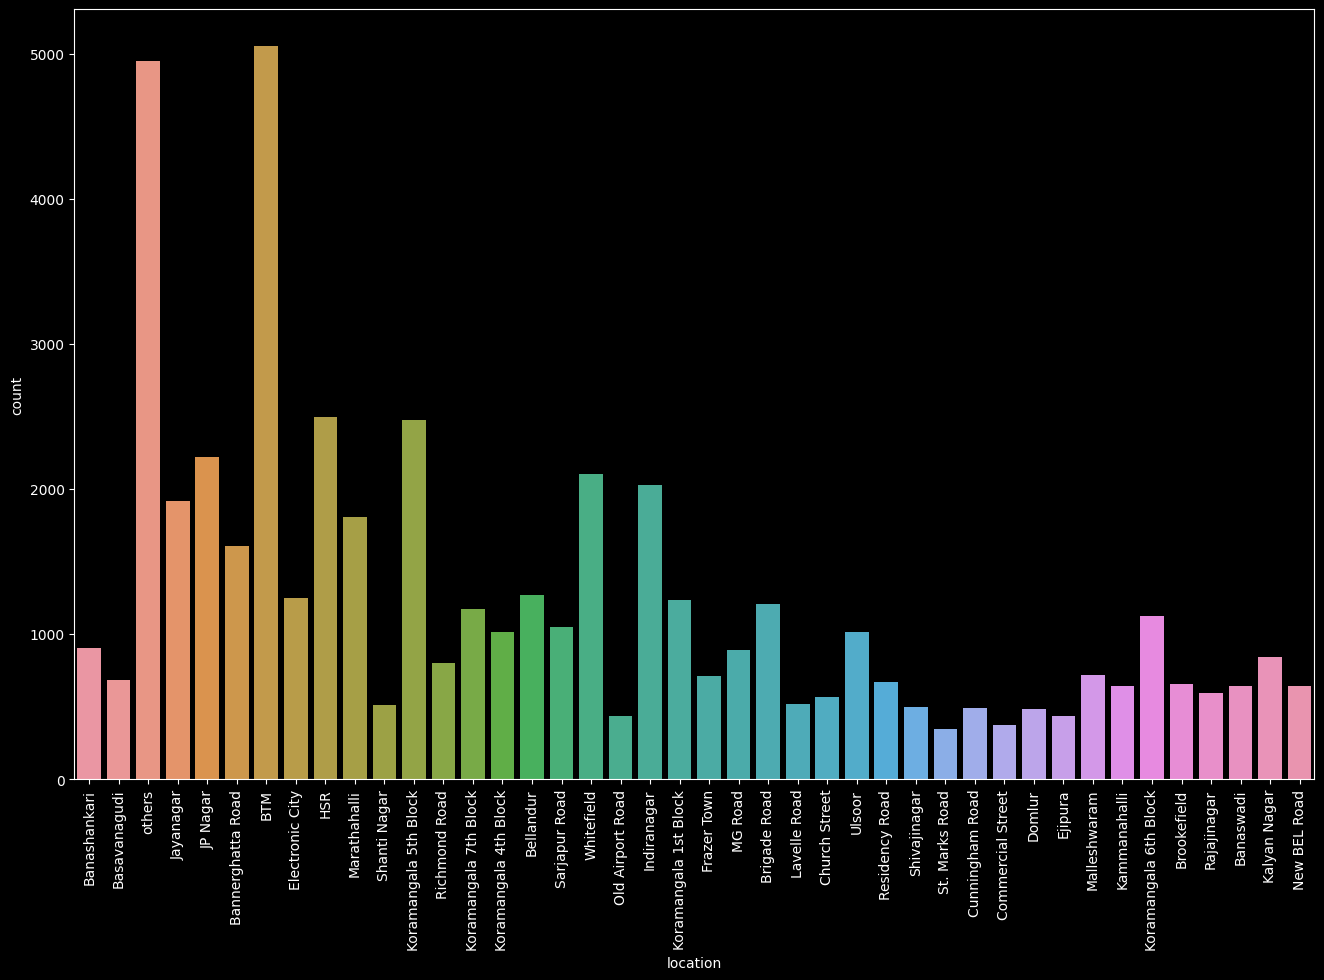

In [187]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x=df['location'])
plt.xticks(rotation=90)

This is describes no of resturants in each location

# Visualizing Online Order

<Axes: xlabel='online_order', ylabel='count'>

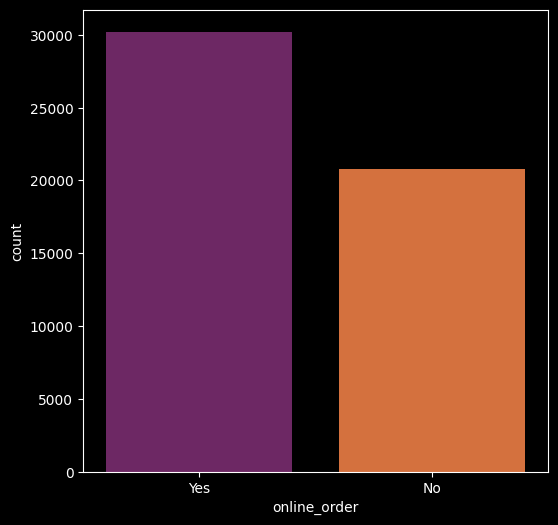

In [189]:
plt.figure(figsize = (6,6))
sns.countplot(x=df['online_order'], palette = 'inferno')

This describes how many resturants has online ordering 

# Visualizing booking tables

<Axes: xlabel='book_table', ylabel='count'>

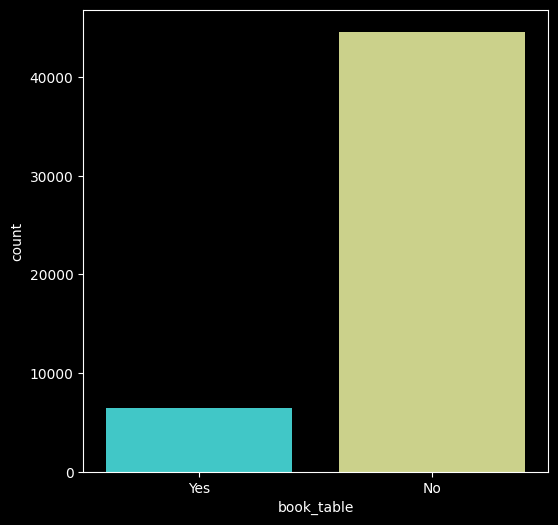

In [190]:
plt.figure(figsize = (6,6))
sns.countplot(x=df['book_table'], palette = 'rainbow')

This describes how many resturants has online ordering 

# Visualizing Top Cuisines

In [193]:
cuisine_grp= df[['cuisines', 'votes']]
cuisine_grp.drop_duplicates()
cuisine = cuisine_grp.groupby(['cuisines'])['votes'].sum()
cuisine

cuisines
Andhra                                                 12299
Andhra, Biryani                                        40339
Arabian                                                16529
Bakery                                                 13148
Bakery, Desserts                                       45464
                                                      ...   
South Indian, North Indian                             14250
South Indian, North Indian, Chinese                    53586
South Indian, North Indian, Chinese, Street Food       33636
Street Food                                            11877
others                                              11542182
Name: votes, Length: 70, dtype: int64

In [194]:
cuisine = cuisine.to_frame()
cuisine = cuisine.sort_values('votes', ascending=False)
cuisine.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [195]:
cuisine = cuisine.iloc[1:, :]
cuisine.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


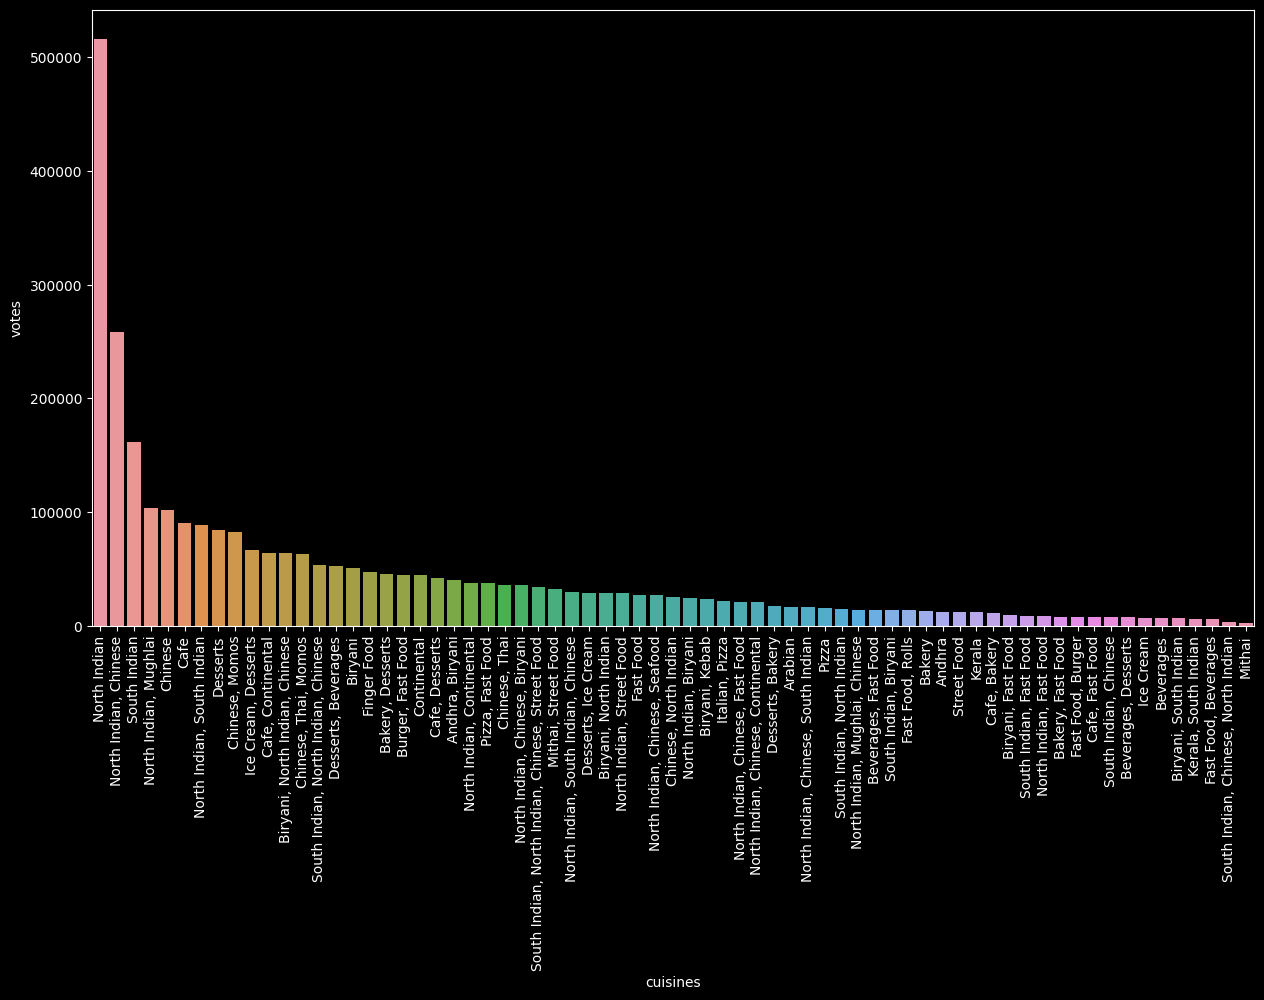

In [199]:
plt.figure(figsize = (15,8))
sns.barplot(x=cuisine.index , y=cuisine['votes'])
plt.xticks(rotation = 90)
plt.show()

This describes top cuisines. According to zomato data, bangalore resturants has high sold rate on North Indian dishes.

# Visualizing Online Order Facility, Location Wise

In [205]:
online_orders = df.groupby(['location','online_order'])['name'].count()
online_orders.to_csv('location_online.csv')
online_orders

location      online_order
BTM           No              1763
              Yes             3293
Banashankari  No               397
              Yes              505
Banaswadi     No               302
                              ... 
Ulsoor        Yes              622
Whitefield    No               986
              Yes             1119
others        No              2064
              Yes             2890
Name: name, Length: 84, dtype: int64

In [207]:
online_orders = pd.read_csv('location_online.csv')
online_orders = pd.pivot_table(online_orders, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

In [208]:
online_orders

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

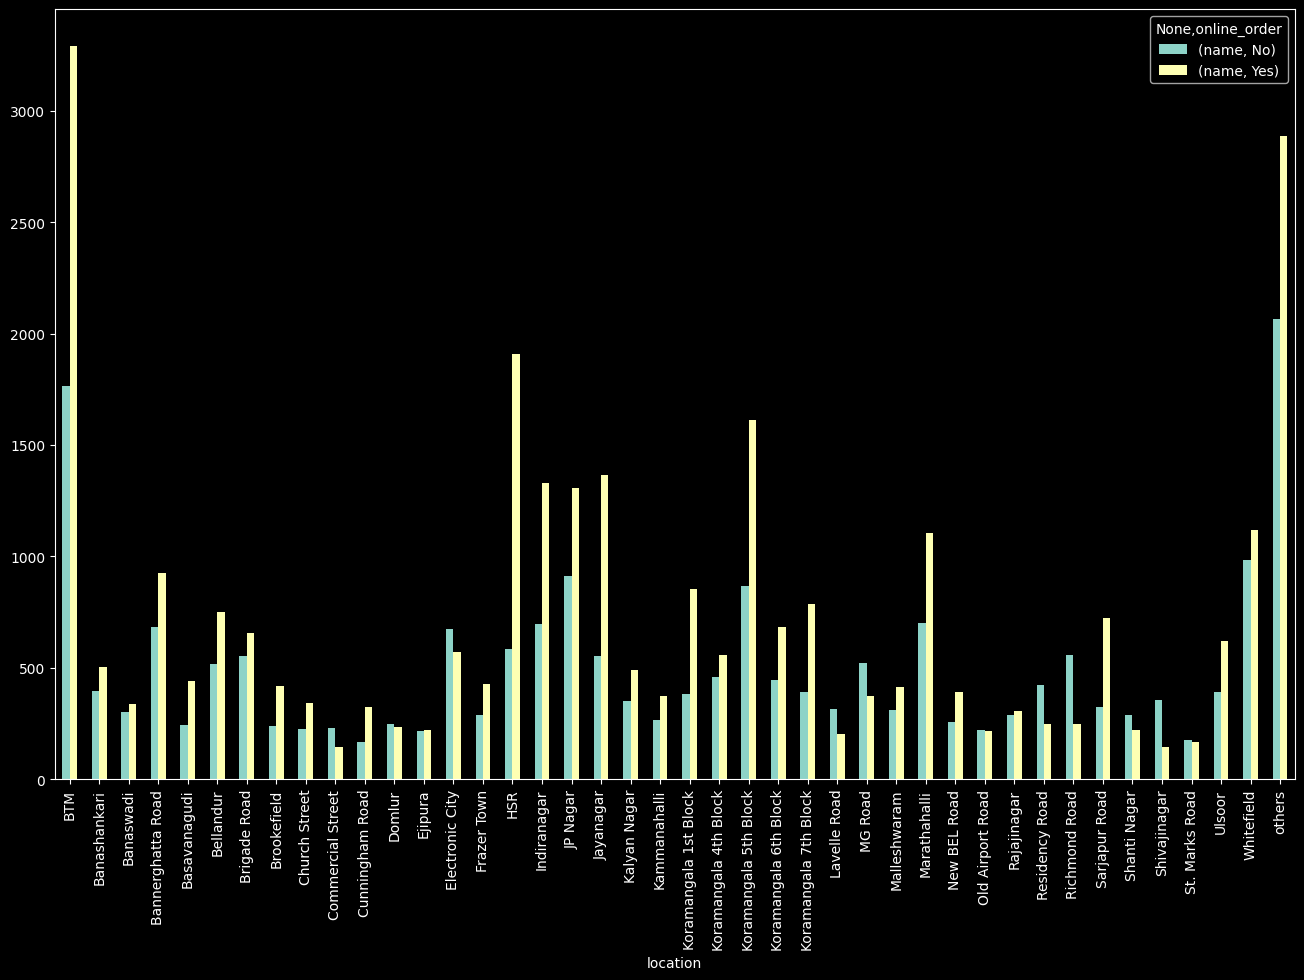

In [209]:
online_orders.plot(kind = 'bar', figsize = (16,10))

Above bargraph shows, how many resturants in each location has online delivery and which has not. According to dataset, bangalore has skyrocketed in online deliveries.

# Visualizing Book Table Facility, Location Wise

In [210]:
book_table = df.groupby(['location','book_table'])['name'].count()
book_table.to_csv('location_booktable.csv')
book_table

location      book_table
BTM           No            4889
              Yes            167
Banashankari  No             839
              Yes             63
Banaswadi     No             632
                            ... 
Ulsoor        Yes            177
Whitefield    No            1852
              Yes            253
others        No            4587
              Yes            367
Name: name, Length: 82, dtype: int64

In [212]:
book_table = pd.read_csv('location_booktable.csv')
book_table = pd.pivot_table(book_table, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)


In [213]:
book_table

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

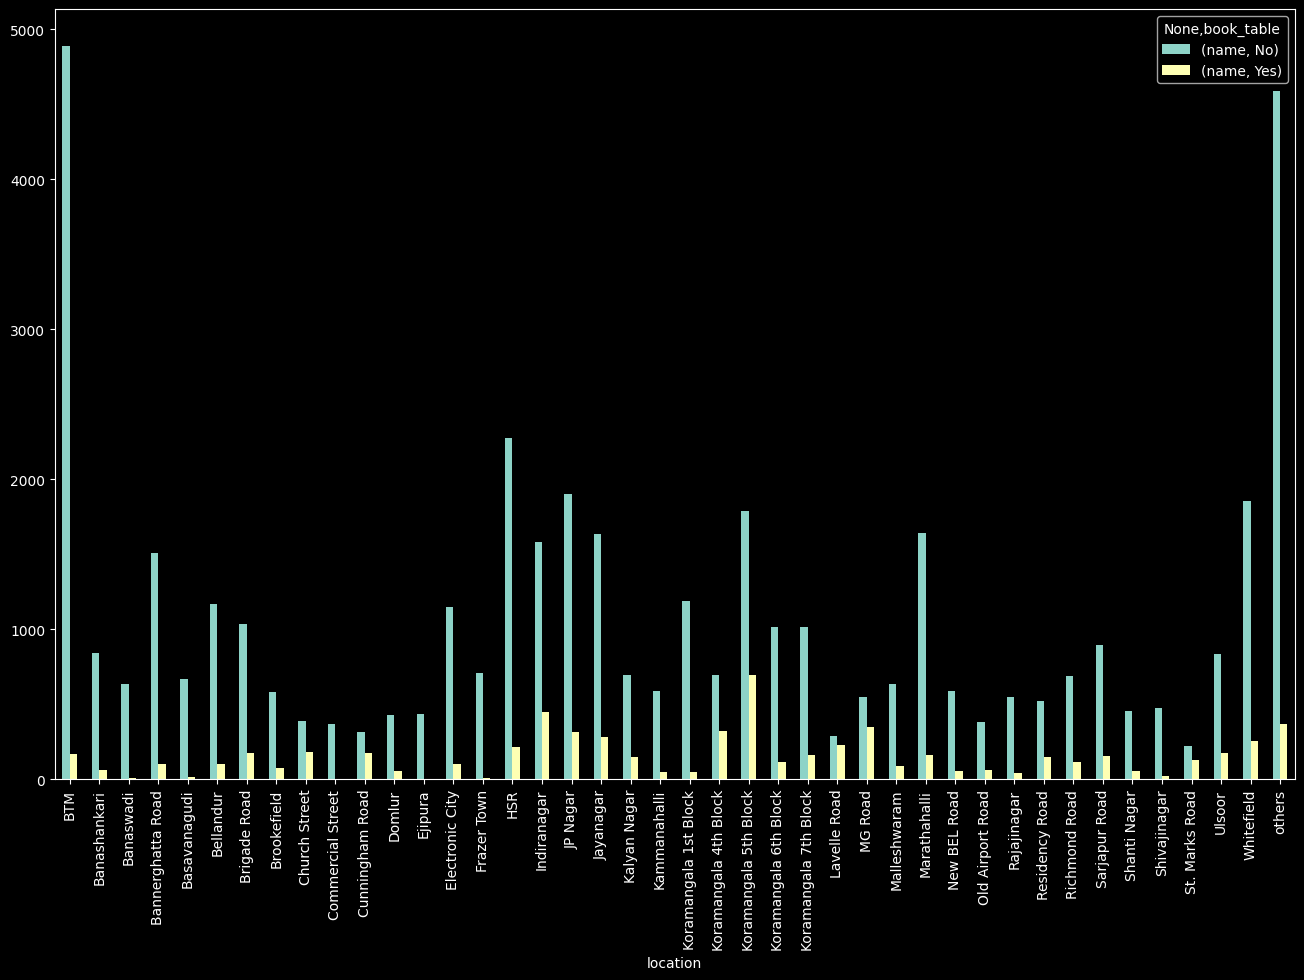

In [217]:
book_table.plot(kind = 'bar', figsize = (16,10))

Above bargraph shows, how many resturants in each location has online delivery and whuch has not. According to dataset, most of the resturants has no booking/reservation  for table.

# Grouping Types of Restaurents, location wise

In [218]:
types_of_resturants = df.groupby(['location','Type'])['name'].count()
types_of_resturants.to_csv('location_Type.csv')
types_of_resturants

location  Type              
BTM       Buffet                  21
          Cafes                   83
          Delivery              3053
          Desserts               198
          Dine-out              1660
                                ... 
others    Delivery              2787
          Desserts               276
          Dine-out              1553
          Drinks & nightlife      75
          Pubs and bars           47
Name: name, Length: 280, dtype: int64

In [283]:
types_of_resturants = pd.read_csv('location_Type.csv')
types_of_resturants = pd.pivot_table(types_of_resturants, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)

In [284]:
types_of_resturants

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

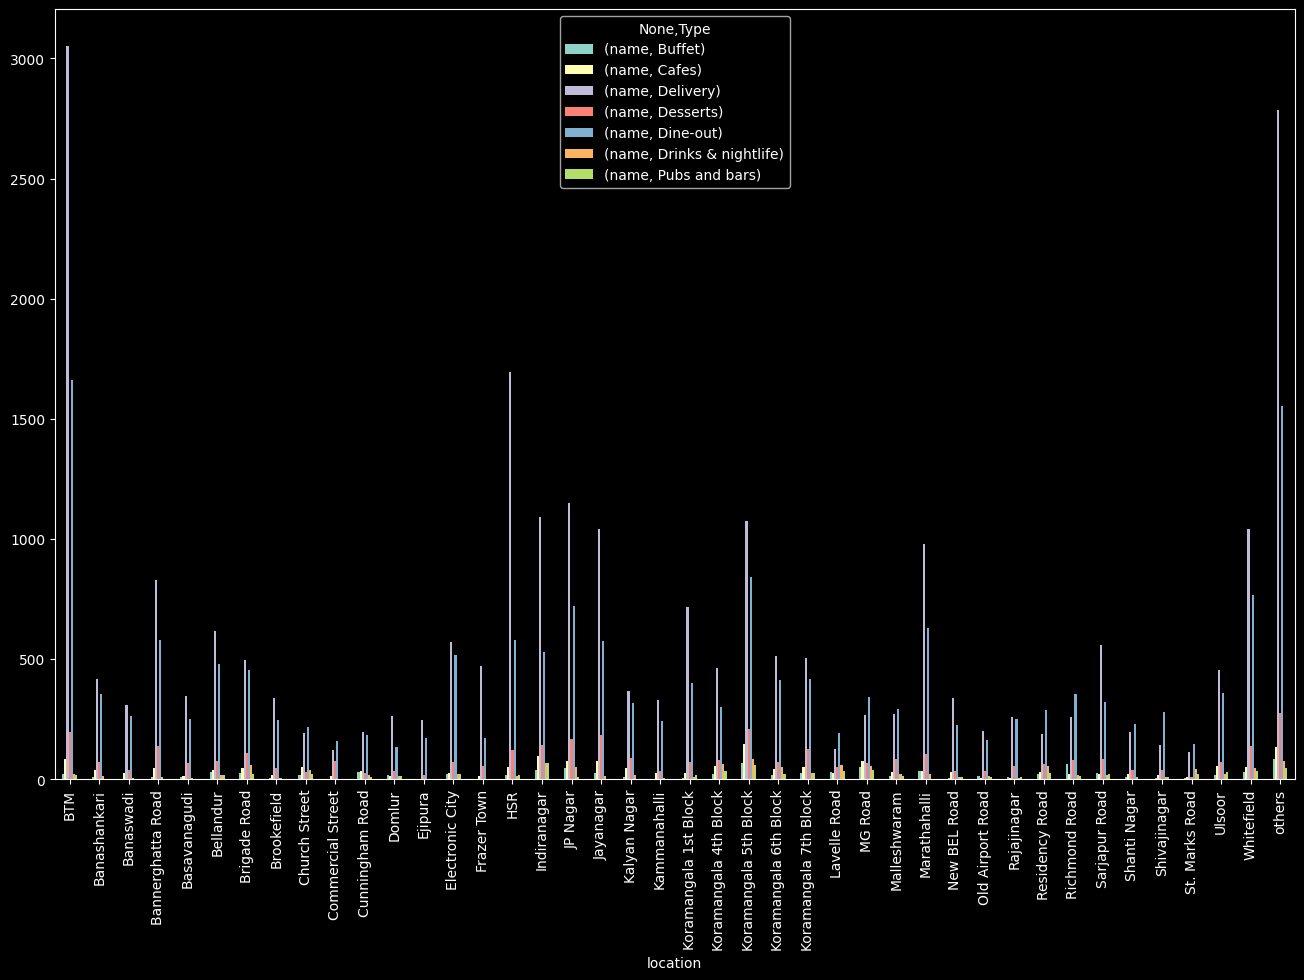

In [285]:
types_of_resturants.plot(kind = 'bar', figsize = (16,10))

This graph shows us the different types under each location. Each location  has rest types such as Buffet, cafes, pubs..etc

# describing the franchises of each brand

In [235]:
df['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Mast Biryani - Night Express                                1
Kings Court Daba                                            1
New Prakash Hotel                                           1
Taja Coffee                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8723, dtype: int64

"cafe coffee day" has highest branch in the bangalore city

# Visualizing Online Order vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

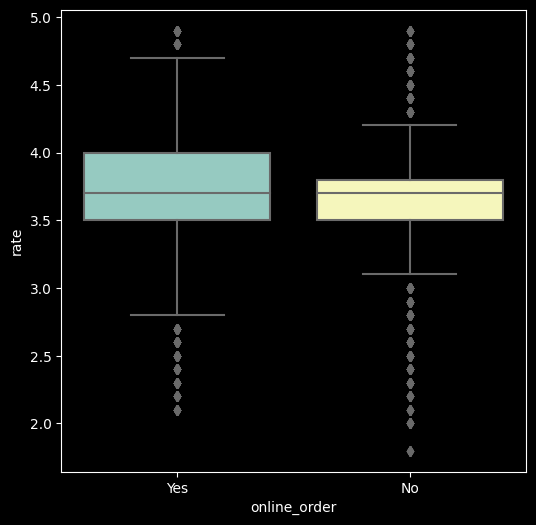

In [236]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

# Visualizing table booking vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

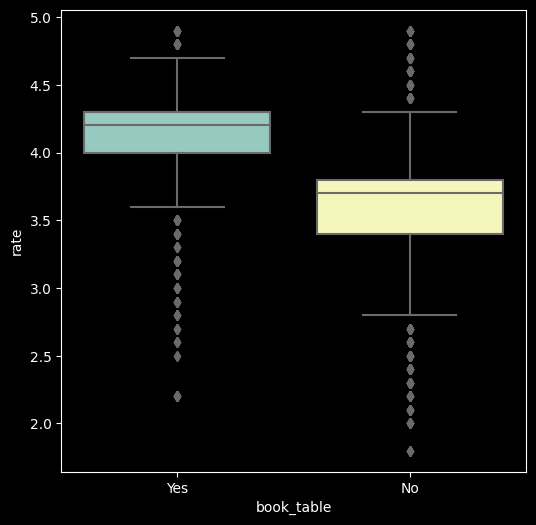

In [237]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)